In [10]:
frame_log = []
cup_score = []
bottle_score = []
spoon_score = []
frame_log.append({"cls":"cup", "coffset":0.6, "box_size": 0.2})
frame_log.append({"cls":"bottle", "coffset":0.4, "box_size": 0.7})
frame_log.append({"cls":"spoon", "coffset":0.8, "box_size": 0.7})
score_list = []
for obj in frame_log:
    score = - obj["coffset"] + obj["box_size"]
    obj["score"] = score
    print(obj)
    score_list.append(score)
    if obj["cls"] == "cup":
        cup_score.append(obj["score"])
    elif obj["cls"] == "bottle":
        bottle_score.append(obj["score"])
    else:
        spoon_score.append(obj["score"])


print(score_list)
target_idx = score_list.index(max(score_list))
print(frame_log[target_idx]["cls"])


{'cls': 'cup', 'coffset': 0.6, 'box_size': 0.2, 'score': -0.39999999999999997}
{'cls': 'bottle', 'coffset': 0.4, 'box_size': 0.7, 'score': 0.29999999999999993}
{'cls': 'spoon', 'coffset': 0.8, 'box_size': 0.7, 'score': -0.10000000000000009}
[-0.39999999999999997, 0.29999999999999993, -0.10000000000000009]
bottle


In [11]:
cup_score, bottle_score, spoon_score

([-0.39999999999999997], [0.29999999999999993], [-0.10000000000000009])

In [5]:
stream_log = []
stream_log.append(frame_log)
stream_log.append(frame_log)
stream_log

[[{'cls': 'cup',
   'coffset': 0.6,
   'box_size': 0.2,
   'score': -0.39999999999999997},
  {'cls': 'bottle',
   'coffset': 0.4,
   'box_size': 0.7,
   'score': 0.29999999999999993},
  {'cls': 'spoon',
   'coffset': 0.8,
   'box_size': 0.7,
   'score': -0.10000000000000009}],
 [{'cls': 'cup',
   'coffset': 0.6,
   'box_size': 0.2,
   'score': -0.39999999999999997},
  {'cls': 'bottle',
   'coffset': 0.4,
   'box_size': 0.7,
   'score': 0.29999999999999993},
  {'cls': 'spoon',
   'coffset': 0.8,
   'box_size': 0.7,
   'score': -0.10000000000000009}]]

In [11]:
len(stream_log)

2

In [17]:
list = []
for i in range(5):
    list.append([])
list

[[], [], [], [], []]

In [69]:
cup_score = []
bottle_score = []
spoon_score = []
for line in open("runs/cup_score.txt"):
    line=line.strip('\n')
    cup_score.append(float(line))
for line in open("runs/bottle_score.txt"):
    line=line.strip('\n')
    bottle_score.append(float(line))
for line in open("runs/spoon_score.txt"):
    line=line.strip('\n')
    spoon_score.append(float(line))

In [70]:
len(cup_score), len(bottle_score), len(spoon_score)

(412, 412, 412)

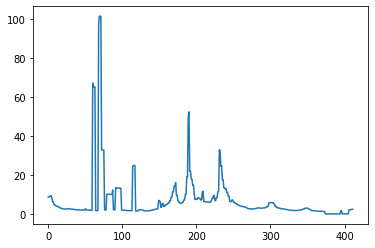

In [71]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, len(cup_score))
y = np.array(cup_score)

plt.plot(x, y)
plt.show()

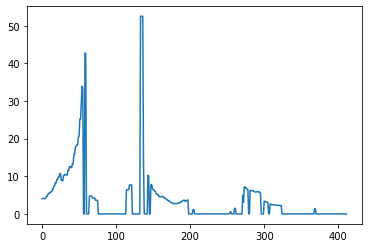

In [72]:
x = np.arange(0, len(bottle_score))
y = np.array(bottle_score)

plt.plot(x, y)
plt.show()

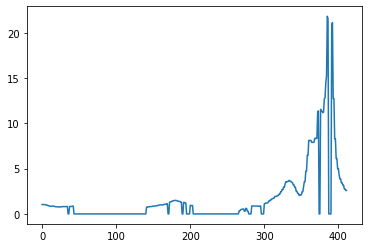

In [73]:
x = np.arange(0, len(spoon_score))
y = np.array(spoon_score)

plt.plot(x, y)
plt.show()

In [64]:
import numpy as np
class_score_log = np.zeros((8, 1))
new_frame = np.ones(8)
class_score_log = np.column_stack((class_score_log,new_frame))
class_score_log

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [66]:
import numpy as np
class_score_log = np.zeros((8, 1))
new_frame = np.zeros(8)
frame_idx = 0
for i in range(5):
    if frame_idx >= 1:
        class_score_log = np.column_stack((class_score_log,new_frame))
    class_score_log[2,:][frame_idx] = 99
    frame_idx += 1
class_score_log

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [99., 99., 99., 99., 99.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])